### Read in data

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import time
from datetime import timedelta, datetime
from matplotlib import pyplot as plt
from collections import defaultdict
import random

In [2]:
con = psycopg2.connect(user = "postgres",
                       password = "",
                       host = "127.0.0.1",
                       port = "5432",
                       database = "adj_noun_pairs")

try:
    cursor = con.cursor();
except (Exception, psycopg2.Error) as error:
    print("Error in Connection",error)

In [3]:
cursor.execute("SELECT * FROM final_pairs WHERE noun IN (SELECT noun FROM final_pairs GROUP BY noun HAVING COUNT(*) > 2)")
all_pairs = cursor.fetchall() 

In [4]:
len(all_pairs)

115295

In [5]:
all_pairs[0]

('eelmine', 'aasta', 53250)

In [5]:
# nouns = list(set([pair[1] for pair in all_pairs]))
# adjectives = list(set([pair[0] for pair in all_pairs]))

In [6]:
dup_nouns = [pair[1] for pair in all_pairs]
# Easy naive for-loop to keep order so results wouldn't change each time
nouns = []
for noun in dup_nouns:
    if noun not in nouns:
        nouns.append(noun)

In [7]:
dup_adjectives = [pair[0] for pair in all_pairs]
adjectives = []
for adj in dup_adjectives:
    if adj not in adjectives:
        adjectives.append(adj)

In [8]:
data = pd.DataFrame(0, index=nouns, columns=adjectives)
data.head()

,eelmine,järgmine,viimane,käesolev,kogu,kohalik,suur,pikk,juriidiline,tulev,...,realiseeritav,valgustatav,vajuv,väikesekasvuline,väikeseformaadiline,õlirikas,õigusetu,oletuslik,raugematu,raudteeäärne
aasta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aeg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
määrus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
omavalitsus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
osa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
for tup in all_pairs:
    data.loc[tup[1], tup[0]] = tup[2]

In [10]:
# data = data.fillna(0)
data.head()

,eelmine,järgmine,viimane,käesolev,kogu,kohalik,suur,pikk,juriidiline,tulev,...,realiseeritav,valgustatav,vajuv,väikesekasvuline,väikeseformaadiline,õlirikas,õigusetu,oletuslik,raugematu,raudteeäärne
aasta,53250,38107,24410,11753,1115,40,114,1562,0,12634,...,0,0,0,0,0,0,0,0,0,0
aeg,75,65,27915,1227,24997,1373,194,14913,0,18,...,0,0,0,0,0,0,0,0,0,0
määrus,16,110,17,27514,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
omavalitsus,30,67,44,0,31,24261,84,0,12,0,...,0,0,0,0,0,0,0,0,0,0
osa,201,436,918,118,51,10,22165,25,0,17,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.shape

(5817, 7358)

In [333]:
cursor.execute("SELECT * FROM final_pairs WHERE noun IN (SELECT noun FROM final_pairs GROUP BY noun HAVING COUNT(*) = 2)")
two = cursor.fetchall() 

In [354]:
two[13]

('avalik', 'internetipunkt', 353)

In [339]:
cursor.execute("SELECT * FROM final_pairs WHERE noun = 'brutopalk'")
cursor.fetchall()

[('keskmine', 'brutopalk', 596), ('suurune', 'brutopalk', 12)]

In [344]:
cursor.execute("SELECT * FROM final_pairs WHERE noun = 'viljastamine'")
cursor.fetchall()

[('kunstlik', 'viljastamine', 551), ('kehaväline', 'viljastamine', 194)]

In [350]:
cursor.execute("SELECT * FROM final_pairs WHERE noun = 'reliikvia'")
cursor.fetchall()

[('viimne', 'reliikvia', 377), ('püha', 'reliikvia', 21)]

In [355]:
cursor.execute("SELECT * FROM final_pairs WHERE noun IN (SELECT noun FROM final_pairs GROUP BY noun HAVING COUNT(*) = 1)")
one = cursor.fetchall() 

In [397]:
one[39]

('kuldne', 'kesktee', 181)

In [359]:
cursor.execute("SELECT * FROM final_pairs WHERE noun = 'võrdõiguslikkus'")
cursor.fetchall()

[('sooline', 'võrdõiguslikkus', 615)]

In [374]:
cursor.execute("SELECT * FROM final_pairs WHERE noun = 'igavik'")
cursor.fetchall()

[('terve', 'igavik', 307)]

In [398]:
cursor.execute("SELECT * FROM final_pairs WHERE noun = 'kesktee'")
cursor.fetchall()

[('kuldne', 'kesktee', 181)]

### LDA

In [12]:
from sklearn.decomposition import LatentDirichletAllocation

In [13]:
lda = LatentDirichletAllocation(n_components=1000, random_state=0)

In [14]:
start = datetime.now()
print(str(timedelta(seconds=time.time()+10800)).split(", ")[1])
results = lda.fit_transform(data)
print(str(timedelta(seconds=time.time()+10800)).split(", ")[1])
print(datetime.now()-start)

2:39:52.110893
2:46:15.396901
0:06:23.287005


In [15]:
topics = {}
for i in range(1000):
    topics[i] = []

for idx, prob in enumerate(results):
    topics[np.argmax(prob)].append(data.index[idx])

In [168]:
import pickle

with open("lda_topics.pickle", "wb") as f:
    pickle.dump(topics, f)

In [158]:
# np.save("lda_1000_nouns_topics.npy", results)

In [161]:
# with open("lda_1000_model.pickle", "wb") as f:
#     pickle.dump(lda, f)

### Results

In [16]:
adjs_in_topics = pd.DataFrame(lda.components_, columns=data.columns)

In [17]:
adjs_in_topics.head()

,eelmine,järgmine,viimane,käesolev,kogu,kohalik,suur,pikk,juriidiline,tulev,...,realiseeritav,valgustatav,vajuv,väikesekasvuline,väikeseformaadiline,õlirikas,õigusetu,oletuslik,raugematu,raudteeäärne
0,570.741504,445.221428,1404.790056,13.756003,72.793022,21.852019,28.644137,37.534237,0.001,12.782522,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
1,0.001000,0.001000,5.227010,0.001000,8.975630,0.001000,10.675260,0.001000,0.001,0.001000,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
2,0.001000,166.437389,134.072860,0.001000,29.245233,15.127251,155.339158,0.001000,0.001,11.127216,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
3,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001,0.001000,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
4,0.001000,0.001000,41.782700,0.001000,0.001000,0.001000,236.242286,0.001000,0.001,0.001000,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001


#### Jaccardi topic

In [113]:
for i, words in topics.items():
    if 'automaatkast' in words:
        print(i, words)

399 ['proteiin', 'käigukast', 'käsikast', 'automaatkast', 'vrakk']


#### Month topics

In [18]:
kuud = ['jaanuar', 'veebruar', 'märts', 'aprill', 'mai', 'juuni', 'juuli', 'august', 'september', 'oktoober', 'november', 'detsember']
idx = []

for kuu in kuud:
    for topic, words in topics.items():
        if kuu in words:
            idx.append(topic)
            continue

In [19]:
idx

[819, 819, 819, 819, 777, 153, 153, 436, 436, 436, 436]

In [20]:
for i in set(idx):
    print(f"topic {i}, with {idx.count(i)} month(s)")
    print(topics[i])
    print("Most common adjectives in topic:")
    print(adjs_in_topics.loc[i][adjs_in_topics.loc[i] > 10].sort_values(ascending=False).head())
    print("----------------------------")

topic 777, with 1 month(s)
['ilm', 'juuni']
Most common adjectives in topic:
ilus       1737.539040
soe        1463.630247
külm       1426.606272
halb       1087.312467
vihmane     784.376655
Name: 777, dtype: float64
----------------------------
topic 153, with 2 month(s)
['suvepäev', 'pirukas', 'pann', 'pliit', 'võileib', 'august', 'juuli', 'armulugu']
Most common adjectives in topic:
kuum      2570.954491
valmis     922.386875
Name: 153, dtype: float64
----------------------------
topic 819, with 4 month(s)
['eelarve', 'riigieelarve', 'eurolaul', 'kasumiprognoos', 'MM-sari', 'MK-sari', 'laureaat', 'lõpetaja', 'eurovisioon', 'riigieksam', 'lauluvõistlus', 'õllesummer', 'abiturient', 'jaanuar', 'aprill', 'suvelavastus', 'märts', 'komeet', 'põhiturniir', 'võidupüha', 'veebruar']
Most common adjectives in topic:
tänavune     9271.572132
uus           274.671727
järgmine       49.422115
olnud          41.592644
katseline      21.848503
Name: 819, dtype: float64
--------------------------

#### Days topics

In [21]:
days = ['esmaspäev', 'teisipäev', 'kolmapäev', 'neljapäev', 'reede', 'laupäev', 'pühapäev']
idx2 = []

for day in days:
    for topic, words in topics.items():
        if day in words:
            idx2.append(topic)
            continue

In [22]:
idx2

[325, 436, 436, 765, 436, 436, 436]

In [23]:
for i in set(idx2):
    print(i, ":", topics[i])
    print("Most common adjectives in topic:")
    print(adjs_in_topics.loc[i][adjs_in_topics.loc[i] > 10].sort_values(ascending=False).head())
    print("----------------------------")

765 : ['nädal', 'õhtu', 'neljapäev', 'koosseis', 'lõik', 'lugemine', 'majandusaasta', 'eelarveaasta', 'olümpia', 'kalendriaasta', 'postitus', 'post', 'aastavahetus', 'loendus', 'kütteperiood', 'maksustamisperiood', 'kalandusaasta', 'aruandeaasta']
Most common adjectives in topic:
eelmine     37353.330967
järgmine    10610.394181
viimane      6736.124606
terve         538.645775
kogu          483.201015
Name: 765, dtype: float64
----------------------------
436 : ['reede', 'sügis', 'nädalavahetus', 'kolmapäev', 'teisipäev', 'laupäev', 'pühapäev', 'nädalalõpp', 'detsember', 'oktoober', 'september', 'november']
Most common adjectives in topic:
läinud      10494.540820
eelmine      3825.620999
eelolev      2689.682555
tulev        1309.282532
järgmine      499.123069
Name: 436, dtype: float64
----------------------------
325 : ['aasta', 'hooaeg', 'sajand', 'esmaspäev']
Most common adjectives in topic:
eelmine     57798.473849
järgmine    40808.817224
viimane     16531.973503
tulev       15

#### Artistic professions

In [24]:
jobs = ['laulja', 'näitleja', 'kunstnik', 'tantsija', 'artist']
idx3 = []

for job in jobs:
    for topic, words in topics.items():
        if job in words:
            idx3.append(topic)
            continue

In [25]:
idx3

[435, 435, 435, 435, 435]

In [26]:
for i in set(idx3):
    print(i, ":", topics[i])
    print("Most common adjectives in topic:")
    print(adjs_in_topics.loc[i][adjs_in_topics.loc[i] > 10].sort_values(ascending=False).head())
    print("----------------------------")

435 : ['näitleja', 'kunstnik', 'laulja', 'muusik', 'autor', 'teadlane', 'kirjanik', 'lavastaja', 'talent', 'helilooja', 'disainer', 'arhitekt', 'tantsija', 'soomlane', 'pianist', 'lauljatar', 'dirigent', 'moekunstnik', 'mängumees', 'luuletaja', 'kotkas', 'näitlejanna', 'jalgpallur', 'vaataja', 'režissöör', 'suusataja', 'artist', 'peategelane', 'armastaja', 'solist', 'jalgrattur', 'korvpallur', 'täiskasvanu', 'rezhissöör', 'inglane', 'sakslane', 'tenor', 'tartlane', 'rattur', 'interpreet', 'kriitik', 'võidusõitja', 'kergejõustiklane', 'viiuldaja', 'haritlane', 'algaja', 'poeet', 'tööhõive', 'perenaine', 'britt', 'looja', 'fotograaf', 'intellektuaal', 'mänd', 'talupidaja', 'näitlejatar', 'isane', 'ajaloolane', 'ajateenija', 'lätlane', 'prantslane', 'lauljanna', 'lõvi', 'hispaanlane', 'sopran', 'põder', 'leedulane', 'äss', 'ameeriklanna', 'judokas', 'tohter', 'reformierakondlane', 'austraallane', 'insener', 'brasiillane', 'jaapanlane', 'vehkleja', 'infokeskus', 'lendur', 'autovaras', 'emm

In [170]:
len(topics[435])

83

In [173]:
ametid = ['näitleja', 'kunstnik', 'laulja', 'muusik', 'autor', 'teadlane', 'kirjanik', 'lavastaja', 'helilooja', 'disainer', 'arhitekt', 'tantsija', 'pianist', 'lauljatar', 'dirigent', 'moekunstnik', 'luuletaja', 'näitlejanna', 'jalgpallur', 'režissöör', 'suusataja', 'artist', 'solist', 'jalgrattur', 'korvpallur', 'režissöör', 'rattur', 'interpreet', 'kriitik', 'võidusõitja', 'kergejõustiklane', 'viiuldaja', 'haritlane', 'poeet', 'fotograaf', 'talupidaja', 'näitlejatar', 'ajaloolane', 'ajateenija', 'lauljanna', 'judokas', 'tohter', 'reformierakondlane', 'insener', 'vehkleja', 'lendur', 'kitarrist', 'balletitantsija']
rahvused = ['soomlane', 'inglane', 'sakslane', 'tartlane', 'britt', 'lätlane', 'prantslane', 'hispaanlane', 'leedulane', 'ameeriklanna', 'austraallane', 'brasiillane', 'jaapanlane']
muu_inimene = ['talent', 'mängumees', 'vaataja', 'peategelane', 'armastaja', 'täiskasvanu', 'tenor', 'algaja', 'perenaine', 'looja', 'intellektuaal', 'sopran', 'äss', 'autovaras', 'emme']
loodus = ['kotkas', 'mänd', 'isane', 'lõvi', 'põder']
muu = ['tööhõive', 'infokeskus']

In [174]:
len(ametid) + len(rahvused) + len(muu_inimene) + len(loodus) + len(muu)

83

In [192]:
per_group = [len(ametid), len(rahvused), len(muu_inimene), len(loodus), len(muu)]
lbls = ["ametid", "rahvused", "muu, inimene", "loomad", "muu"]

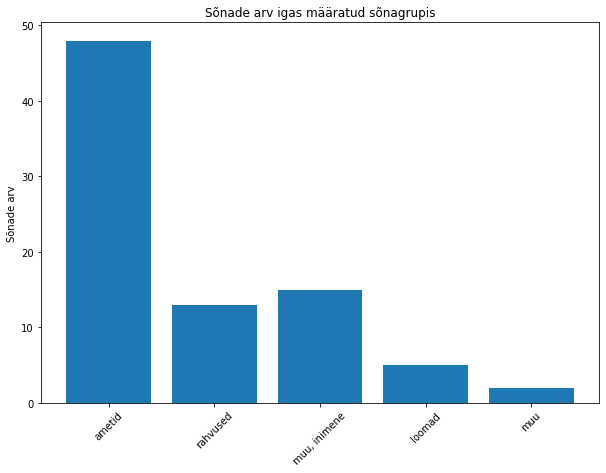

In [193]:
plt.figure(figsize=(10, 7))
plt.bar(lbls, per_group)
plt.xticks(rotation = 45)
plt.ylabel("Sõnade arv")
plt.title("Sõnade arv igas määratud sõnagrupis")
plt.savefig("word_count_lda_topic.png")
plt.show()

#### Sports

In [27]:
spordialad = ['jalgpall', 'korvpall', 'pesapall', 'võrkpall', 'golf', 'tennis']
idx4 = []

for spordiala in spordialad:
    for topic, words in topics.items():
        if spordiala in words:
            idx4.append(topic)
            continue

In [28]:
idx4

[200, 412, 412]

In [194]:
for i in set(idx4):
    print(i, ":", topics[i])
    print(adjs_in_topics.loc[i][adjs_in_topics.loc[i] > 10].sort_values(ascending=False).head())
    print("----------------------------")

200 : ['jalgpall', 'keskmängija', 'ääremängija', 'poolkaitsja', 'tsenter', 'võistlusmaa', 'tagamängija', 'võidusõit', 'eraldistart', 'kaitsja', 'tagamees', 'rannariba', 'suusarada', 'publikukatse']
pikkune          4052.477314
ründav            265.001000
vasakukäeline      52.001000
uus                10.563259
Name: 200, dtype: float64
----------------------------
412 : ['osa', 'tänu', 'hulk', 'tõenäosus', 'saal', 'vahe', 'määr', 'slämm', 'ekraan', 'lootus', 'koormus', 'rõõm', 'risk', 'pauk', 'lava', 'segadus', 'armastus', 'au', 'puudus', 'tükk', 'nõudlus', 'teater', 'vanker', 'eelis', 'pluss', 'pettumus', 'populaarsus', 'osakaal', 'panus', 'kivi', 'eeskuju', 'pingutus', 'hüpe', 'tööpuudus', 'potentsiaal', 'töökoormus', 'pidu', 'mägi', 'staar', 'kära', 'menu', 'rahvahulk', 'skandaal', 'veoauto', 'kott', 'kaal', 'naaber', 'kaubanduskeskus', 'protsent', 'sport', 'kaar', 'kergendus', 'peo', 'kaubamaja', 'tugi', 'tulekahju', 'edusamm', 'tung', 'varvas', 'tüli', 'väin', 'hunnik', 'miinus'

#### Abstract ?

In [30]:
abstract = ['ilu', 'inimõigus', 'vabadus']
idx5 = []

for a in abstract:
    for topic, words in topics.items():
        if a in words:
            idx5.append(topic)
            continue

In [31]:
idx5

[907, 763, 997]

In [32]:
for i in set(idx5):
    print(i, ":", topics[i])
    print("----------------------------")

907 : ['ilu', 'verejooks', 'mina', 'töökorraldus', 'põlemine', 'riknemine', 'puhastumine']
----------------------------
997 : ['vabadus', 'kasutusaeg']
----------------------------
763 : ['argument', 'inimõigus', 'vastuargument', 'tegevussuund']
----------------------------


### Adjectives in topics

#### Finding properties of nouns

In [243]:
def top_10_nouns_for_adjective(results, adj_index):
    probs= [(index, result) for index, result in enumerate(results[:, adj_index])]
    sorted_probs = sorted(probs, key=lambda x: x[1], reverse=True)
    top_10 = [x[0] for x in sorted_probs[:10]]
    return data.iloc[top_10]

In [221]:
adjs_in_topics['suur'].sort_values(ascending=False).head(10)

412    160773.051897
795      5762.924096
450      4509.747714
465      3057.443684
906      2740.613407
285      2566.488133
121      2288.356731
791      1763.049285
355      1749.769472
605      1432.859406
Name: suur, dtype: float64

In [283]:
adjs_in_topics.loc[412].sort_values(ascending=False).head(10)

suur            160773.051897
mõtteline          952.337892
väike              437.588991
tühine             286.312431
veepealne          213.016354
kaduvväike         158.001000
sõnaline           123.452745
puutetundlik       104.001000
arvutu              94.001000
veealune            91.077582
Name: 412, dtype: float64

In [244]:
top_10_nouns_for_adjective(results, 412)

,eelmine,järgmine,viimane,käesolev,kogu,kohalik,suur,pikk,juriidiline,tulev,...,realiseeritav,valgustatav,vajuv,väikesekasvuline,väikeseformaadiline,õlirikas,õigusetu,oletuslik,raugematu,raudteeäärne
tänu,0,0,0,0,0,0,16634,0,0,0,...,0,0,0,0,0,0,0,0,0,0
slämm,0,0,38,0,0,0,1419,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tõenäosus,0,0,0,0,0,0,4471,0,0,0,...,0,0,0,0,0,0,0,0,0,0
töökoormus,0,0,0,0,0,0,337,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vanker,0,0,0,0,0,0,483,0,0,0,...,0,0,0,0,0,0,0,0,0,0
õhin,0,0,0,0,0,0,87,0,0,0,...,0,0,0,0,0,0,0,0,0,0
saladuskate,0,0,0,0,0,0,116,0,0,0,...,0,0,0,0,0,0,0,0,0,0
allahindlus,0,0,0,0,0,0,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
osatähtsus,0,0,15,0,0,0,162,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hundikoer,0,0,0,0,0,0,72,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
adjs_in_topics['uus'].sort_values(ascending=False).head(10)

343    144594.599963
325      7007.374924
240      5013.053514
118      4824.742813
459      4330.708109
632      3192.509450
106      3065.636168
398      2727.361235
565      2632.024542
574      2493.604951
Name: uus, dtype: float64

In [284]:
adjs_in_topics.loc[343].sort_values(ascending=False).head(10)

uus                  144594.599963
suur                     63.686882
olnud                    52.142329
siiratud                 50.001000
pealekasvav              48.001000
sirguv                   36.001000
jõudev                   14.379150
praegune                 14.210404
olev                     12.359257
kolmekümneaastane        12.001000
Name: 343, dtype: float64

In [248]:
top_10_nouns_for_adjective(results, 343)[['uus']]

,uus
neer,148
tulija,660
elurajoon,144
tuumajaam,189
ravikindlustusseadus,117
põhimäärus,118
koalitsioonilepe,110
spordihall,104
alkoholiseadus,94
väikeauto,81


In [252]:
cursor.execute("SELECT * FROM final_pairs WHERE noun = 'ravikindlustusseadus'")
cursor.fetchall() 

[('uus', 'ravikindlustusseadus', 117),
 ('jõustuv', 'ravikindlustusseadus', 13),
 ('kehtiv', 'ravikindlustusseadus', 12)]

In [254]:
adjs_in_topics['endine'].sort_values(ascending=False).head(10)

335    24633.723675
398     7220.963728
638     1386.961763
727      678.035955
785      577.205767
527      483.909160
627      475.670590
490      467.000610
565      408.796024
354      311.136676
Name: endine, dtype: float64

In [285]:
adjs_in_topics.loc[335].sort_values(ascending=False).head(10)

endine      24633.723675
uus          1210.649953
kunagine      257.626057
praegune      131.363435
olnud          59.670518
senine         41.860616
eelmine         0.189086
osanud          0.041025
kohalik         0.024580
tollane         0.003812
Name: 335, dtype: float64

In [255]:
top_10_nouns_for_adjective(results, 335)[['endine']]

,endine
tippsportlane,130
töökaaslane,141
komissar,90
kasvandik,37
alluv,101
raamatupidaja,72
poksija,68
riigisekretär,42
asetäitja,91
vabadusvõitleja,65


In [280]:
adjs_in_topics['kuiv'].sort_values(ascending=False).head(10)

777    607.492401
110    486.877441
860    286.001000
640    262.517732
710    229.915349
642    197.293564
973    154.757928
811    151.001000
38     135.065339
682     54.319686
Name: kuiv, dtype: float64

In [291]:
adjs_in_topics.loc[110].sort_values(ascending=False).head(10)

kuiv                486.877441
administratiivne    238.343556
jõuetu               95.001000
haukuv               55.001000
allasurutud          13.153012
võimetu              13.001000
metsik                2.124186
suur                  0.921857
pime                  0.001028
koolikohustuslik      0.001000
Name: 110, dtype: float64

In [292]:
top_10_nouns_for_adjective(results, 110)[['kuiv']]

,kuiv
suutlikkus,0
köha,50
raev,0
hein,38
siider,13
viha,0
teekate,13
skoor,10
trenn,77
lapp,28


In [302]:
adjs_in_topics.loc[777].sort_values(ascending=False).head(10)

ilus       1737.539040
soe        1463.630247
külm       1426.606272
halb       1087.312467
vihmane     784.376655
kuum        626.311995
kuiv        607.492401
hea         474.287163
jahe        435.084748
palav       432.882732
Name: 777, dtype: float64

In [305]:
print(list(adjs_in_topics.loc[777].sort_values(ascending=False).head(10).index))

['ilus', 'soe', 'külm', 'halb', 'vihmane', 'kuum', 'kuiv', 'hea', 'jahe', 'palav']


In [281]:
top_10_nouns_for_adjective(results, 777)[['kuiv']]

,kuiv
ilm,600
juuni,0
jaanipäev,0
kliima,33
hommik,0
suvi,178
suvepäev,0
rõhutamine,0
balletitantsija,0
kuumalaine,0


In [293]:
topics[777]

['ilm', 'juuni']

In [294]:
probs= [(index, result) for index, result in enumerate(results[:, 777])]
sorted_probs = sorted(probs, key=lambda x: x[1], reverse=True)

In [300]:
sorted_probs[:10]

[(115, 0.9925496569639267),
 (5364, 0.27705892895192974),
 (4181, 0.1094975725244189),
 (1568, 0.025513956453961192),
 (112, 0.018343928424436655),
 (88, 0.0046246699438789),
 (1441, 4.146474256668826e-05),
 (5815, 3.2258064516129156e-05),
 (5814, 3.2258064516129074e-05),
 (5812, 3.225806451612907e-05)]

In [306]:
list(data.iloc[[115, 5364, 4181, 1568, 112, 88, 1441]].index)

['ilm', 'juuni', 'jaanipäev', 'kliima', 'hommik', 'suvi', 'suvepäev']

In [282]:
adjs_in_topics.loc[777].sort_values(ascending=False).head(10)

ilus       1737.539040
soe        1463.630247
külm       1426.606272
halb       1087.312467
vihmane     784.376655
kuum        626.311995
kuiv        607.492401
hea         474.287163
jahe        435.084748
palav       432.882732
Name: 777, dtype: float64

In [287]:
adjs_in_topics['valge'].sort_values(ascending=False).head(10)

805    11903.350954
637     3829.188459
640      906.980428
936      597.272464
294      473.001000
939      455.322021
286      388.831549
490      378.001000
585      315.100034
264      212.369111
Name: valge, dtype: float64

In [288]:
adjs_in_topics.loc[805].sort_values(ascending=False).head(10)

valge           11903.350954
redutseeriv       196.001000
kahtlustatud       65.001000
üleliigne          46.378752
punetav            27.615969
kupardamata        20.001000
suur               18.445862
pruunikas          17.353810
40kraadine         13.456356
ekstra             13.001000
Name: 805, dtype: float64

In [270]:
top_10_nouns_for_adjective(results, 805)[['valge']]

,valge
triiksärk,57
pulber,344
vares,117
põll,43
suhkur,580
sukkpüksid,36
hiinlane,112
hõlst,31
lina,240
peakapsas,36


In [289]:
adjs_in_topics['märg'].sort_values(ascending=False).head(10)

878    560.025717
957    246.958835
43      94.570987
682     89.135767
777     66.292565
284     64.001000
561     41.473305
38      33.906186
837     30.691561
264     27.525228
Name: märg, dtype: float64

In [290]:
adjs_in_topics.loc[878].sort_values(ascending=False).head(10)

märg           560.025717
väheoluline     67.001000
inetu           43.434104
tsingitud       26.001000
tammealune      25.001000
roostevaba      12.463092
pisike          10.191438
õhuke            5.527104
suur             2.885670
uus              2.424354
Name: 878, dtype: float64

#### Colours

In [33]:
colours = ['valge', 'kollane', 'oranž', 'roosa', 'punane', 'pruun', 'roheline', 'sinine', 'lilla', 'hall', 'must']

In [34]:
adjs_in_topics[colours]

,valge,kollane,oranž,roosa,punane,pruun,roheline,sinine,lilla,hall,must
0,0.00100,0.545502,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001,0.001000,0.00100
1,0.00100,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001,0.001000,0.00100
2,0.00100,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001,0.001000,0.00100
3,0.00100,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001,0.001000,0.00100
4,0.00100,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001,0.001000,0.00100
...,...,...,...,...,...,...,...,...,...,...,...
995,0.00100,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001,0.001000,0.00100
996,0.00100,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001,0.001000,0.00100
997,0.00100,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001,0.001000,0.00100
998,0.00100,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001,0.001000,0.00100


In [209]:
colours_topics_one = defaultdict(list)

for colour in colours:
    col_topics = adjs_in_topics[colour][adjs_in_topics[colour] > 0.002].sort_values(ascending=False).head(1)
    for index in col_topics.index:
        colours_topics_one[index].append(colour)

In [307]:
colours_topics_one

defaultdict(list,
            {805: ['valge'],
             752: ['kollane'],
             959: ['oranž'],
             496: ['roosa'],
             329: ['punane'],
             416: ['pruun'],
             204: ['roheline'],
             677: ['sinine'],
             939: ['lilla'],
             379: ['hall'],
             134: ['must']})

In [319]:
probs_939 = [(index, result) for index, result in enumerate(results[:, 939])]
sorted_probs_939 = sorted(probs_939, key=lambda x: x[1], reverse=True)

In [321]:
sorted_probs_939[:10]

[(272, 0.8494960620046151),
 (2015, 0.8014153512370403),
 (2851, 0.32380192219104764),
 (3855, 0.2060709313848664),
 (4125, 0.18919052087010166),
 (3767, 0.06488919007810948),
 (2149, 0.0287205707196025),
 (1087, 0.016573913323523384),
 (932, 0.01392950902346764),
 (279, 0.005048691209668549)]

In [320]:
data.iloc[[p[0] for p in sorted_probs_939[:10]]]

,eelmine,järgmine,viimane,käesolev,kogu,kohalik,suur,pikk,juriidiline,tulev,...,realiseeritav,valgustatav,vajuv,väikesekasvuline,väikeseformaadiline,õlirikas,õigusetu,oletuslik,raugematu,raudteeäärne
värv,0,0,0,0,12,0,23,0,0,0,...,0,0,0,0,0,0,0,0,0,0
õppeaeg,0,0,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
värvus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
värvitoon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mentaliteet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
karp,0,0,0,0,0,0,41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hoidmine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
suits,0,0,27,0,0,0,24,0,0,27,...,0,0,0,0,0,0,0,0,0,0
vaim,0,0,0,0,0,0,66,0,0,0,...,0,0,0,0,0,0,0,0,0,0
silm,0,0,29,0,15,11,928,29,0,0,...,0,0,0,0,0,0,0,0,0,0


In [326]:
adjs_in_topics.loc[939].sort_values(ascending=False).head(10)

must        661.397574
valge       455.322021
punane      382.163574
sinine      348.424775
roheline    332.037126
erinev      229.138818
kollane     210.620216
eri         205.267363
ergas       200.457755
tume        174.355420
Name: 939, dtype: float64

In [329]:
data.loc['õppeaeg'].sort_values(ascending=False)

nominaalne      110
kahekordne       13
kogu             13
raudteeäärne      0
valev             0
               ... 
lunastatav        0
lükatud           0
nilbe             0
neonatslik        0
eelmine           0
Name: õppeaeg, Length: 7358, dtype: int64

In [330]:
adjs_in_topics.loc[939][['nominaalne', 'kahekordne', 'kogu']]

nominaalne    109.965114
kahekordne      0.001000
kogu           11.817805
Name: 939, dtype: float64

In [332]:
for idx, colour_list in colours_topics_one.items():
    print(colour_list[0])
    print(adjs_in_topics.loc[idx].sort_values(ascending=False).head(5))
    print("-------------------")

valge
valge           11903.350954
redutseeriv       196.001000
kahtlustatud       65.001000
üleliigne          46.378752
punetav            27.615969
Name: 805, dtype: float64
-------------------
kollane
kollane         3222.804728
punane           277.845910
uus              168.969867
visa             115.001000
ambulatoorne      76.001000
Name: 752, dtype: float64
-------------------
oranž
laulev       1380.067132
oranž         210.092127
uus            57.944320
suur           50.301973
värviline      34.001000
Name: 959, dtype: float64
-------------------
roosa
roosa          560.256796
hapu           124.675806
lõhnav          46.749442
lilla           24.001000
kuldkollane     21.001000
Name: 496, dtype: float64
-------------------
punane
punane        12831.997814
valge           207.683792
uus              73.250230
tulipunane       42.221775
suur             21.703467
Name: 329, dtype: float64
-------------------
pruun
pruun           482.024908
keedetud        121.000999
ko

In [312]:
for idx, colour_list in colours_topics_one.items():
    colour = colour_list[0]
    display(top_10_nouns_for_adjective(results, idx)[[colour]])

,valge
triiksärk,57
pulber,344
vares,117
põll,43
suhkur,580
sukkpüksid,36
hiinlane,112
hõlst,31
lina,240
peakapsas,36


,kollane
liidrisärk,267
muutkond,0
kaart,1342
kääbus,20
liblikas,33
allveelaev,63
tulp,23
teemant,12
takso,21
nokk,11


,oranž
revolutsioon,183
kitarrist,0
sall,10
liiv,0
näitleja,0
helilooja,0
potentsiaal,0
koalitsioon,18
rahvas,0
laps,0


,roosa
elevant,29
põrsas,10
ärileht,17
majandusleht,11
õis,46
viinamari,0
prill,102
triiksärk,10
padi,13
hein,0


,punane
latern,525
tellis,171
rist,1054
kurat,112
rätt,53
paprika,122
roos,290
rätik,141
foorituli,182
sõstar,155


,pruun
riis,68
katk,23
kääbus,15
nahktagi,21
vitamiin,0
autopomm,0
jume,52
koloriit,10
värvus,66
suhkur,60


,roheline
konn,63
aas,71
mehike,149
spargel,27
vöönd,69
mander,195
puru,31
mõttelaad,35
uba,39
barett,60


,sinine
vilkur,219
teksased,34
silmaalune,51
paviljon,49
ingel,31
dressipüksid,13
teksad,33
lõvi,17
kombinesoon,14
suss,10


,lilla
värv,59
õppeaeg,0
värvus,0
värvitoon,0
mentaliteet,0
karp,0
hoidmine,0
suits,0
vaim,0
silm,0


,hall
kardinal,280
argipäev,109
tsoon,287
habe,163
kaabu,12
graniit,13
karv,91
vunts,23
mass,282
vanamees,13


,must
prügikott,74
pipar,558
nahktagi,54
lammas,293
masendus,237
graniit,35
valge,132
sukk,44
kalamari,135
täkk,27


In [212]:
for colour in colours:
    col_topics = adjs_in_topics[colour][adjs_in_topics[colour] > 0.002].sort_values(ascending=False).head(1)
    for index in col_topics.index:
        print(colour, topics[index])
        print(adjs_in_topics.loc[index].sort_values(ascending=False).head(10))
    print("---------------")

valge ['suhkur', 'pulber', 'viin', 'laik', 'lina', 'pluus', 'sein', 'triip', 'kinnas', 'vares', 'hiinlane', 'šokolaad', 'rass', 'jõulud', 'paberileht', 'kepp', 'liiv', 'triiksärk', 'kaubik', 'neeger', 'T-särk', 'krae', 'rüü', 'luik', 'põll', 'sukkpüksid', 'peakapsas', 'hõlst', 'ratsu', 'plastmass', 'rant', 'puri', 'kääbus', 'klahv', 'sammas', 'ürp', 'mikrobuss', 'uss']
valge           11903.350954
redutseeriv       196.001000
kahtlustatud       65.001000
üleliigne          46.378752
punetav            27.615969
kupardamata        20.001000
suur               18.445862
pruunikas          17.353810
40kraadine         13.456356
ekstra             13.001000
Name: 805, dtype: float64
---------------
kollane ['kaart', 'liidrisärk', 'allveelaev', 'muutkond', 'liblikas', 'tulp']
kollane           3222.804728
punane             277.845910
uus                168.969867
visa               115.001000
ambulatoorne        76.001000
topograafiline      61.001000
topoloogiline       54.001000
suur    

In [35]:
for colour in colours:
    print(f"Värv '{colour}'")
    col_topics = adjs_in_topics[colour][adjs_in_topics[colour] > 0.002].sort_values(ascending=False)
    print(f"Number of topics with probability > 0.002 (default) is {len(col_topics)}")
    print(col_topics)
    print("-------------------------")

Värv 'valge'
Number of topics with probability > 0.002 (default) is 85
805    11903.350954
637     3829.188459
640      906.980428
936      597.272464
294      473.001000
           ...     
723        0.082900
32         0.055380
643        0.021315
753        0.019792
315        0.003149
Name: valge, Length: 85, dtype: float64
-------------------------
Värv 'kollane'
Number of topics with probability > 0.002 (default) is 45
752    3222.804728
73      361.038128
264     250.474534
939     210.620216
888     143.926409
584     116.970154
156     105.859873
49       99.926937
91       93.815074
637      82.466808
133      80.500452
67       61.826304
921      42.605557
539      29.617844
394      21.407486
284      19.001000
437      16.001000
909      16.001000
739      15.972689
963      15.948127
837      13.780807
729      13.139268
879      12.980450
561      12.332591
309      12.022412
294      12.001000
946      11.001000
318      11.001000
605      10.001000
936      10.001000


In [36]:
colours_topics = defaultdict(list)

for colour in colours:
    col_topics = adjs_in_topics[colour][adjs_in_topics[colour] > 0.002].sort_values(ascending=False).head(3)
    for index in col_topics.index:
        colours_topics[index].append(colour)

In [37]:
colours_topics

defaultdict(list,
            {805: ['valge'],
             637: ['valge'],
             640: ['valge', 'roosa', 'punane'],
             752: ['kollane'],
             73: ['kollane'],
             264: ['kollane'],
             959: ['oranž'],
             939: ['oranž',
              'roosa',
              'punane',
              'sinine',
              'lilla',
              'hall',
              'must'],
             49: ['oranž', 'lilla'],
             496: ['roosa', 'lilla'],
             329: ['punane'],
             416: ['pruun'],
             837: ['pruun', 'sinine'],
             557: ['pruun'],
             204: ['roheline'],
             43: ['roheline'],
             904: ['roheline'],
             677: ['sinine'],
             379: ['hall'],
             561: ['hall'],
             134: ['must'],
             865: ['must']})

In [206]:
print(topics[939])

['värv', 'õppeaeg', 'värvus']


In [39]:
adjs_in_topics.loc[939][adjs_in_topics.loc[939] > 100].sort_values(ascending=False)

must          661.397574
valge         455.322021
punane        382.163574
sinine        348.424775
roheline      332.037126
erinev        229.138818
kollane       210.620216
eri           205.267363
ergas         200.457755
tume          174.355420
uus           158.216238
hall          156.440457
pruun         151.118696
ilus          138.794692
nominaalne    109.965114
Name: 939, dtype: float64

In [40]:
cursor.execute("SELECT * FROM final_pairs WHERE noun = 'õppeaeg'")
print(cursor.fetchall())

[('nominaalne', 'õppeaeg', 110), ('kahekordne', 'õppeaeg', 13), ('kogu', 'õppeaeg', 13)]


In [42]:
cursor.execute("SELECT * FROM final_pairs WHERE noun = 'värv' AND adjective IN ('nominaalne', 'kahekordne', 'kogu')")
print(cursor.fetchall())

[('kogu', 'värv', 12)]


In [44]:
cursor.execute("SELECT * FROM final_pairs WHERE noun = 'värvus'")
print(cursor.fetchall())

[('pruun', 'värvus', 66), ('kollane', 'värvus', 61), ('punakas', 'värvus', 57), ('punane', 'värvus', 53), ('valge', 'värvus', 32), ('ebaühtlane', 'värvus', 31), ('helepruun', 'värvus', 31), ('roheline', 'värvus', 27), ('sinine', 'värvus', 25), ('tume', 'värvus', 25), ('oranž', 'värvus', 24), ('ilus', 'värvus', 22), ('must', 'värvus', 16), ('iseloomulik', 'värvus', 15), ('hele', 'värvus', 15), ('ühtlane', 'värvus', 14), ('pruunikas', 'värvus', 13), ('kollakas', 'värvus', 13), ('omane', 'värvus', 12), ('rohekas', 'värvus', 12), ('kuldkollane', 'värvus', 11), ('ergas', 'värvus', 10), ('erinev', 'värvus', 10), ('loomulik', 'värvus', 10), ('helekollane', 'värvus', 10), ('punakaspruun', 'värvus', 10)]


In [94]:
rand = random.randint(0, 1000)
adjs_in_topics.loc[rand][adjs_in_topics.loc[rand] > 100].sort_values(ascending=False)

viimane       4231.689166
praegune      2604.287998
otsustav       914.720262
õige           885.356601
raske          773.722203
järgmine       659.602655
käesolev       391.156831
vajalik        375.254698
vaba           322.195379
sobiv          300.899093
kriitiline     279.091107
viimne         266.001000
ilus           180.440132
tähtis         157.188854
ärev           155.001000
ajalooline     154.644129
võimalik       138.515636
helge          136.440860
olnud          131.397644
ainus          122.434803
oluline        120.636748
suvaline       118.001000
paras          106.573454
Name: 748, dtype: float64

In [134]:
rand = random.randint(0, 1000)
adjs_in_topics.loc[rand][adjs_in_topics.loc[rand] > 100].sort_values(ascending=False)

ajaline           902.882850
kvantitatiivne    137.000977
Name: 522, dtype: float64

In [157]:
adjs_in_topics.loc[572].sort_values(ascending=False).head(18)

eelmine        12743.511760
läinud          7781.843584
järgmine        4102.351657
tulev           3929.335994
eelolev         1352.416811
viimane          491.261679
ülemöödunud      396.544947
olnud            282.094395
üle-eelmine      258.437833
kogu             147.726107
saabuv           137.749306
põuane           123.771766
vihmane          119.793988
terve             95.279565
suur              74.504829
valmis            59.070196
lähenev           58.335823
pilves            53.001000
Name: 572, dtype: float64

In [74]:
adjs_in_topics.loc[495].sort_values(ascending=False).head(18)

seotud             2309.124818
järgmine           2276.871754
täpsustav          2067.001000
puudutav           1480.541357
oluline            1464.534648
kirjalik           1168.999892
protseduuriline    1068.001000
hea                 965.962245
viimane             925.779511
põhimõtteline       913.001000
konkreetne          754.997010
eelmine             754.931770
tähtis              693.996366
poliitiline         691.998136
lihtne              560.001000
raske               530.994719
seonduv             512.414573
tehniline           480.001000
Name: 495, dtype: float64

In [118]:
topics[495]

['särk', 'T-särk', 'vihik', 'kaustik', 'vihikuleht', 'peopesa', 'flanellsärk']

In [45]:
for colour in colours:
    print(f"Värv '{colour}'")
    col_topics = adjs_in_topics[colour][adjs_in_topics[colour] > 0.002].sort_values(ascending=False)
    top_1 = col_topics.index[0]
    print(f"Topic with highest probability is {top_1}:")
    print(topics[top_1])
    print("-------------------------")

Värv 'valge'
Topic with highest probability is 805:
['suhkur', 'pulber', 'viin', 'laik', 'lina', 'pluus', 'sein', 'triip', 'kinnas', 'vares', 'hiinlane', 'šokolaad', 'rass', 'jõulud', 'paberileht', 'kepp', 'liiv', 'triiksärk', 'kaubik', 'neeger', 'T-särk', 'krae', 'rüü', 'luik', 'põll', 'sukkpüksid', 'peakapsas', 'hõlst', 'ratsu', 'plastmass', 'rant', 'puri', 'kääbus', 'klahv', 'sammas', 'ürp', 'mikrobuss', 'uss']
-------------------------
Värv 'kollane'
Topic with highest probability is 752:
['kaart', 'liidrisärk', 'allveelaev', 'muutkond', 'liblikas', 'tulp']
-------------------------
Värv 'oranž'
Topic with highest probability is 959:
['revolutsioon']
-------------------------
Värv 'roosa'
Topic with highest probability is 496:
['õis', 'elevant']
-------------------------
Värv 'punane'
Topic with highest probability is 329:
['rist', 'latern', 'väljak', 'vaip', 'roos', 'planeet', 'foorituli', 'tellis', 'sõstar', 'rätik', 'paprika', 'kurat', 'terror', 'nupp', 'kukk', 'tõug', 'müts', '

#### Positive adjectives about intelligence

In [49]:
adjs = ['tark', 'intelligentne', 'arukas', 'taibukas']

In [50]:
adjs_topics = defaultdict(list)

for adj in adjs:
    adj_topics = adjs_in_topics[adj][adjs_in_topics[adj] > 0.002].sort_values(ascending=False).head(3)
    for index in adj_topics.index:
        adjs_topics[index].append(adj)

In [51]:
adjs_topics

defaultdict(list,
            {294: ['tark', 'intelligentne', 'arukas', 'taibukas'],
             936: ['tark', 'intelligentne', 'arukas'],
             853: ['tark'],
             872: ['intelligentne'],
             172: ['arukas']})

In [52]:
for adj in adjs:
    print(f"Omadussõna '{adj}'")
    adj_topics = adjs_in_topics[adj][adjs_in_topics[adj] > 0.002].sort_values(ascending=False)
    print(f"Number of topics with probability > 0.002 (default) is {len(adj_topics)}")
    print(adj_topics.head(3))
    print("-------------------------")

Omadussõna 'tark'
Number of topics with probability > 0.002 (default) is 59
294    904.723390
936    638.001000
853    306.219889
Name: tark, dtype: float64
-------------------------
Omadussõna 'intelligentne'
Number of topics with probability > 0.002 (default) is 18
294    410.307102
936     70.001000
872     44.740066
Name: intelligentne, dtype: float64
-------------------------
Omadussõna 'arukas'
Number of topics with probability > 0.002 (default) is 29
294    360.001
936     60.001
172     52.001
Name: arukas, dtype: float64
-------------------------
Omadussõna 'taibukas'
Number of topics with probability > 0.002 (default) is 1
294    15.001
Name: taibukas, dtype: float64
-------------------------


In [53]:
topics[294]

['inimene']

In [54]:
topics[936]

['mees']

## Informative adjectives per topic

In [86]:
sort = adjs_in_topics.loc[3].sort_values(ascending=False)
sort[sort * 100 > sort[0]]

vastutav     2141.170447
asjaomane      30.272110
Name: 3, dtype: float64

In [123]:
sort = adjs_in_topics.sort_values(ascending=False)
sort[sort * 2 > sort[0]]

TypeError: sort_values() missing 1 required positional argument: 'by'

In [127]:
for i in range(1000):
    sort = adjs_in_topics.loc[i].sort_values(ascending=False)
    sort = sort[sort * 2 > sort[0]]
    if len(sort) > 1:
        print(sort)
        print()

strateegiline    103.189986
üleilmne          69.001000
tark              63.946522
poliitiline       61.272208
Name: 1, dtype: float64

peamine    779.709853
raske      670.727441
pandud     618.326013
esmane     539.821396
uus        409.347897
Name: 2, dtype: float64

süntaktiline    168.999959
uus             144.981348
Name: 5, dtype: float64

riigipoolne         87.330965
ühendusepoolne      81.001000
täiendav            72.435630
riigieelarveline    53.543842
poolne              52.863893
Name: 6, dtype: float64

tugev          658.467923
poliitiline    391.736957
järgmine       341.446793
Name: 10, dtype: float64

juhtiv     339.620994
mõjukas    333.029663
kohalik    268.564633
noor       268.538359
Name: 11, dtype: float64

kohtulik      987.278318
kohtueelne    589.313454
Name: 14, dtype: float64

vajalik       2532.753921
ettenähtud    2364.646410
võetud        1282.201626
Name: 17, dtype: float64

neljaliikmeline    353.214683
kolmeliikmeline    334.929863
viieliikmeline  

keskmine    611.580705
ainus       338.542263
noor        329.835035
Name: 219, dtype: float64

vaheline          811.574423
rahvusvaheline    487.592644
ühiskondlik       471.540879
omavaheline       451.675883
kahepoolne        428.345749
Name: 223, dtype: float64

kauge    522.001000
helge    487.001000
suur     387.843744
Name: 226, dtype: float64

statistiline     123.309056
eelarveväline    115.001000
Name: 227, dtype: float64

sümboolne    565.028811
uus          350.323409
Name: 228, dtype: float64

väldanud            182.043836
etniline            171.637478
rahvustevaheline    155.001000
verine              109.282905
Name: 230, dtype: float64

tuttav       443.071990
õige         438.935937
hea          399.841627
kummaline    397.736880
sarnane      261.494899
imelik       256.604257
suvaline     246.387575
Name: 235, dtype: float64

demokraatlik    552.785459
autonoomne      339.910447
Name: 236, dtype: float64

samanimeline    485.839637
kirjanduslik    358.971211
mahuka

kasutamata    132.054486
ilmalik       118.272193
Name: 380, dtype: float64

jooksev    956.316893
rikas      815.526229
Name: 381, dtype: float64

kaaluv           50.994467
poolekilone      46.001000
immateriaalne    46.001000
250grammine      33.001000
Name: 383, dtype: float64

paha    778.659948
hea     490.660211
Name: 384, dtype: float64

hea       225.015764
lihtne    149.595679
suur      148.607577
ainus     144.986209
uus       139.693944
Name: 385, dtype: float64

ballistiline    313.001000
kohtuväline     251.001000
tariifne        231.001000
lastud          223.576569
Name: 390, dtype: float64

vaieldamatu    499.378028
uus            479.634313
kindel         348.889823
senine         313.008834
Name: 393, dtype: float64

erialane            140.597120
hea                 128.748902
postmodernistlik    110.765975
võõrkeelne           81.661032
algupärane           79.001000
Name: 394, dtype: float64

verine         793.329433
sõjaväeline    680.336776
Name: 396, dtype: fl

igavene     720.835822
apostlik    440.001000
Name: 636, dtype: float64

endine    1386.961763
uus        716.317180
Name: 638, dtype: float64

punane    1110.931690
valge      906.980428
Name: 640, dtype: float64

mõru                      414.903348
ühendusesisene            380.001000
liikmesriikidevaheline    233.001000
maksuvaba                 216.001000
Name: 641, dtype: float64

vasak    898.126482
tühi     471.170285
Name: 644, dtype: float64

territoriaalne    388.996671
lage              261.852099
Name: 645, dtype: float64

raudteeäärne     0.001
lahtiklopitud    0.001
mõlemapoolne     0.001
kuuekäiguline    0.001
kooliskäiv       0.001
                 ...  
lunastatav       0.001
lükatud          0.001
nilbe            0.001
neonatslik       0.001
eelmine          0.001
Name: 646, Length: 7358, dtype: float64

kättesaadav    362.412709
mobiilne       193.501912
Name: 647, dtype: float64

terav    274.759688
vasak    214.716590
eri      156.599580
Name: 648, dtype: float64

samaväärne    429.684515
tulus         228.630233
Name: 792, dtype: float64

uus       483.451419
oma       366.078465
omane     311.056276
erinev    258.444505
Name: 793, dtype: float64

eriline    11122.811809
suur        5762.924096
Name: 795, dtype: float64

hulkuv    224.001000
elav      179.359873
haige     173.618780
kodutu    163.963693
Name: 796, dtype: float64

asuv               324.074670
viiekorruseline    246.993742
suur               194.056781
Name: 797, dtype: float64

sisene            431.001000
suurejooneline    387.681366
tööstuslik        307.808204
Name: 798, dtype: float64

noor            318.841519
hea             263.394681
elav            201.589975
bioloogiline    200.717868
olnud           181.728876
armastav        174.507587
Name: 802, dtype: float64

liikuv      229.066659
uus         196.098636
pargitud    193.156231
seisev      186.402925
kuuluv      167.846183
olev        162.494950
Name: 807, dtype: float64

kogu      953.310965
soe       832.001000

Name: 967, dtype: float64

võidukas    505.035551
õnnelik     469.291277
Name: 970, dtype: float64

heakskiidetud    487.444057
süütu            267.076528
Name: 974, dtype: float64

võimatu    191.731193
jäetud     190.780089
viitav     134.278542
Name: 975, dtype: float64

hea      3251.650168
uus      2245.257474
ainus    2240.313387
Name: 980, dtype: float64

ümmargune    188.031989
ühine        175.306849
suur         172.738111
Name: 984, dtype: float64

kõlvatu    564.001000
aus        402.728811
Name: 985, dtype: float64

kurb       340.001000
edasine    291.171729
Name: 987, dtype: float64

raudteeäärne     0.001
lahtiklopitud    0.001
mõlemapoolne     0.001
kuuekäiguline    0.001
kooliskäiv       0.001
                 ...  
lunastatav       0.001
lükatud          0.001
nilbe            0.001
neonatslik       0.001
eelmine          0.001
Name: 993, Length: 7358, dtype: float64



In [91]:
informative_adjs = {}

for i in range(1000):
    sort = adjs_in_topics.loc[i].sort_values(ascending=False)
    informative_adjs[i] = sort[sort * 100 > sort[0]]

In [120]:
uks = 0
for i in range(1000):
    if len(informative_adjs[i].index) == 1:
        print(i, len(topics[i]) if len(topics[i]) > 50 else topics[i])
        print(informative_adjs[i])
        print()
        uks += 1

7 ['liikluskindlustus', 'kogumispension', 'reserv', 'pensionifond', 'kindlustus', 'ajateenistus', 'ettekirjutus', 'atribuut', 'usuõpetus', 'õppeaine', 'destilleerimine', 'ID-kaart', 'kindlustamine']
kohustuslik    4692.305225
Name: 7, dtype: float64

15 ['ametnik', 'riigiametnik', 'konts', 'vererõhk', 'palavik', 'iga', 'ametiisik', 'kvalifikatsioon', 'politseiametnik', 'riigitegelane', 'reiting', 'sõjaväelane', 'moraal', 'noot', 'naftahind', 'rohi', 'müür', 'ametipost', 'linnaametnik', 'kaelus', 'kallas', 'riskitegur', 'piletihind', 'lagi', 'torn', 'soo', 'riskiaste', 'aktsiis', 'üür', 'võimukandja', 'vaimulik', 'ametimees', 'inimareng', 'plank', 'väävlisisaldus', 'asetus', 'vaimsus']
kõrge    17813.911434
Name: 15, dtype: float64

29 ['raamatukogu', 'kraad', 'meeskoor', 'spordiklubi', 'prorektor', 'muinsuskaitse', 'draamateater']
akadeemiline    3092.750538
Name: 29, dtype: float64

113 ['heaolu', 'toimetulek', 'efektiivsus', 'kitsikus', 'integratsioon', 'edukus', 'madalseis', 'hoob',

In [121]:
uks

46

In [195]:
one_adj = []
for i in range(1000):
    if len(informative_adjs[i].index) == 1:
        one_adj.extend(informative_adjs[i].index)

In [196]:
print(one_adj)

['kohustuslik', 'kõrge', 'akadeemiline', 'majanduslik', 'must', 'loomulik', 'kaheringiline', 'sotsiaalne', 'roheline', 'tõeline', 'alandlik', 'tehniline', 'teatav', 'pikk', 'uus', 'vaheline', 'isiklik', 'avalik', 'kogu', 'võimalik', 'suur', 'teisipäevaõhtune', 'kõva', 'armas', 'vajalik', 'poliitiline', 'üldine', 'juhtiv', 'rahvuslik', 'püha', 'vastastikune', 'eelnev', 'ühine', 'lõplik', 'kohalik', 'hea', 'vaba', 'normaalne', 'kindel', 'olnud', 'kriitiline', 'keskmine', 'värske', 'pehme', 'tavaline', 'täiendav']


In [200]:
print(sorted(one_adj))

['akadeemiline', 'alandlik', 'armas', 'avalik', 'eelnev', 'hea', 'isiklik', 'juhtiv', 'kaheringiline', 'keskmine', 'kindel', 'kogu', 'kohalik', 'kohustuslik', 'kriitiline', 'kõrge', 'kõva', 'loomulik', 'lõplik', 'majanduslik', 'must', 'normaalne', 'olnud', 'pehme', 'pikk', 'poliitiline', 'püha', 'rahvuslik', 'roheline', 'sotsiaalne', 'suur', 'tavaline', 'teatav', 'tehniline', 'teisipäevaõhtune', 'täiendav', 'tõeline', 'uus', 'vaba', 'vaheline', 'vajalik', 'vastastikune', 'värske', 'võimalik', 'ühine', 'üldine']


In [201]:
one_adj_len = []
for i in range(1000):
    if len(informative_adjs[i].index) == 1:
        one_adj_len.append((informative_adjs[i].index[0], len(topics[i])))

In [202]:
print(sorted(one_adj_len, key=lambda x: x[1], reverse=True))

[('uus', 408), ('suur', 335), ('hea', 125), ('kohalik', 60), ('kogu', 51), ('võimalik', 51), ('pikk', 50), ('poliitiline', 48), ('avalik', 44), ('keskmine', 42), ('must', 38), ('kõrge', 37), ('rahvuslik', 28), ('isiklik', 27), ('vaba', 23), ('vajalik', 22), ('olnud', 21), ('ühine', 20), ('sotsiaalne', 19), ('tehniline', 19), ('vaheline', 18), ('majanduslik', 16), ('tõeline', 16), ('kindel', 15), ('kohustuslik', 13), ('tavaline', 13), ('roheline', 12), ('üldine', 12), ('värske', 12), ('täiendav', 12), ('juhtiv', 10), ('lõplik', 10), ('akadeemiline', 7), ('kõva', 7), ('pehme', 7), ('vastastikune', 5), ('normaalne', 5), ('püha', 4), ('loomulik', 3), ('teatav', 3), ('eelnev', 3), ('armas', 1), ('kriitiline', 1), ('kaheringiline', 0), ('alandlik', 0), ('teisipäevaõhtune', 0)]


In [155]:
nmf_mono = ['suur', 'kohalik', 'hea', 'uus', 'avalik', 'keskmine', 'rahvusvaheline', 'isiklik', 'eelmine', 'ühine', 'kõrge', 'riiklik', 'täis', 'tugev', 'must', 'külm', 'kehaline', 'vana', 'vaba', 'viimane', 'viimane', 'erinev', 'vaikne', 'alaline', 'läinud', 'tulumaksuvaba', 'vastav', 'vaba', 'seotud', 'vastutav', 'olnud', 'õrn', 'oma', 'tehniline', 'uus', 'peamine', 'korralik', 'oluline', 'vastastikune', 'negatiivne', 'järgmine', 'tõsine', 'sobiv', 'tänane', 'eelmine', 'täiendav', 'oluline', 'poliitiline', 'positiivne', 'kindel', 'üldine', 'käsitlev', 'praegune', 'olev', 'kuuluv', 'konkreetne', 'võimalik', 'elav', 'põllumajanduslik', 'võrdne']

In [156]:
one_adj = []
for i in range(1000):
    if len(informative_adjs[i].index) == 1:
        one_adj.extend(informative_adjs[i].index)

In [161]:
print(len(set(nmf_mono) & set(one_adj)), set(nmf_mono) & set(one_adj))

19 {'kindel', 'kõrge', 'võimalik', 'vastastikune', 'hea', 'vaba', 'täiendav', 'kohalik', 'tehniline', 'uus', 'must', 'üldine', 'avalik', 'ühine', 'isiklik', 'suur', 'poliitiline', 'olnud', 'keskmine'}


In [163]:
print(len(set(nmf_mono) - set(one_adj)), set(nmf_mono) - set(one_adj))

36 {'erinev', 'seotud', 'eelmine', 'oluline', 'praegune', 'kuuluv', 'konkreetne', 'tõsine', 'riiklik', 'põllumajanduslik', 'positiivne', 'rahvusvaheline', 'oma', 'kehaline', 'olev', 'negatiivne', 'elav', 'viimane', 'vaikne', 'alaline', 'vana', 'võrdne', 'tulumaksuvaba', 'vastutav', 'õrn', 'külm', 'vastav', 'tänane', 'peamine', 'sobiv', 'tugev', 'läinud', 'käsitlev', 'korralik', 'täis', 'järgmine'}


In [165]:
print(len(set(one_adj) - set(nmf_mono)), set(one_adj) - set(nmf_mono))

27 {'kriitiline', 'juhtiv', 'loomulik', 'tavaline', 'akadeemiline', 'pikk', 'eelnev', 'lõplik', 'pehme', 'teisipäevaõhtune', 'kaheringiline', 'kohustuslik', 'rahvuslik', 'majanduslik', 'kõva', 'teatav', 'roheline', 'vajalik', 'tõeline', 'püha', 'värske', 'alandlik', 'sotsiaalne', 'vaheline', 'armas', 'normaalne', 'kogu'}


In [167]:
19 + 36 + 27

82

In [108]:
for i in range(1000):
    if len(informative_adjs[i].index) == 1:
        print(i, len(topics[i]) if len(topics[i]) > 50 else topics[i])
        print(informative_adjs[i])
        print()

7 ['liikluskindlustus', 'kogumispension', 'reserv', 'pensionifond', 'kindlustus', 'ajateenistus', 'ettekirjutus', 'atribuut', 'usuõpetus', 'õppeaine', 'destilleerimine', 'ID-kaart', 'kindlustamine']
kohustuslik    4692.305225
Name: 7, dtype: float64

15 ['ametnik', 'riigiametnik', 'konts', 'vererõhk', 'palavik', 'iga', 'ametiisik', 'kvalifikatsioon', 'politseiametnik', 'riigitegelane', 'reiting', 'sõjaväelane', 'moraal', 'noot', 'naftahind', 'rohi', 'müür', 'ametipost', 'linnaametnik', 'kaelus', 'kallas', 'riskitegur', 'piletihind', 'lagi', 'torn', 'soo', 'riskiaste', 'aktsiis', 'üür', 'võimukandja', 'vaimulik', 'ametimees', 'inimareng', 'plank', 'väävlisisaldus', 'asetus', 'vaimsus']
kõrge    17813.911434
Name: 15, dtype: float64

29 ['raamatukogu', 'kraad', 'meeskoor', 'spordiklubi', 'prorektor', 'muinsuskaitse', 'draamateater']
akadeemiline    3092.750538
Name: 29, dtype: float64

113 ['heaolu', 'toimetulek', 'efektiivsus', 'kitsikus', 'integratsioon', 'edukus', 'madalseis', 'hoob',

In [122]:
for i in range(1000):
    if len(informative_adjs[i].index) == 2:
        print(i, len(topics[i]) if len(topics[i]) > 50 else topics[i])
        print(informative_adjs[i])
        print()

3 ['töötleja', 'sekretär', 'toimetaja']
vastutav     2141.170447
asjaomane      30.272110
Name: 3, dtype: float64

8 ['aktsioon', 'sekkumine', 'võimsus', 'otstarve', 'kohalolek', 'võimekus', 'doktriin', 'õpetus', 'allianss', 'agressioon', 'ähvardus', 'riigikaitse', 'kallaletung']
sõjaline    6173.971505
heategev      81.925275
Name: 8, dtype: float64

25 ['kohaldamine', 'tervik', 'piletisüsteem', 'majandusruum', 'energiaturg']
ühtne         6133.665331
ühetaoline      89.802147
Name: 25, dtype: float64

39 ['pall', 'itaallane', 'norralane', 'austerlane', 'kiirabi', 'tšehh']
tulnud    5796.964750
uus        124.226979
Name: 39, dtype: float64

54 ['vaev', 'kütteõli', 'karploom', 'saak', 'korv', 'eine', 'muie', 'iroonia', 'paanika', 'aktsent', 'külmetus', 'jalavigastus', 'põrutus', 'kättesaadavus', 'elukomme', 'puudutus', 'nostalgia']
kerge             6062.927412
kahepoolmeline     358.001000
Name: 54, dtype: float64

81 ['värav', 'erand', 'väljapääs', 'lohutus', 'pääsetee', 'tabamus', 

In [110]:
for i in range(1000):
    if len(informative_adjs[i].index) > 100:
        print(i, len(topics[i]) if len(topics[i]) > 50 else topics[i])
        print(informative_adjs[i].head())
        print()

2 ['ülesanne']
peamine    779.709853
raske      670.727441
pandud     618.326013
esmane     539.821396
uus        409.347897
Name: 2, dtype: float64

11 ['poliitik']
juhtiv     339.620994
mõjukas    333.029663
kohalik    268.564633
noor       268.538359
hea        128.154433
Name: 11, dtype: float64

22 ['territoorium']
lepinguosaline          565.299546
kohtuväline             185.366144
jõutud                  145.609751
konventsiooniosaline    143.613451
kõnealune               121.517991
Name: 22, dtype: float64

32 ['puu', 'kreem']
raske       214.429435
suur        195.950412
niisutav    195.001000
vaimne      178.638433
uus         126.528017
Name: 32, dtype: float64

43 ['tee', 'rada']
õige        1402.009130
pikk        1076.945259
libe        1031.453825
uus          849.735716
roheline     608.738892
Name: 43, dtype: float64

46 ['hind']
kõrge     1660.453092
soodne    1241.154588
odav       770.439688
uus        682.917755
hea        568.689040
Name: 46, dtype: float64

49 

837 ['silm']
suur      916.595122
sinine    482.093159
paljas    314.588093
pruun     234.201883
ilus      230.749924
Name: 837, dtype: float64

838 ['ühendus']
kuritegelik    337.000284
kogu           330.811731
käsitlev       265.001000
poliitiline    181.661594
seotud         174.452284
Name: 838, dtype: float64

840 ['valik', 'velg']
õige         647.395271
suur         425.346685
looduslik    251.989335
raske        210.299846
hea          203.870884
Name: 840, dtype: float64

848 ['plaan']
suur        1306.902830
esialgne    1196.658415
kindel       553.734774
praegune     489.116913
edasine      341.340573
Name: 848, dtype: float64

853 ['jutt']
olnud    874.782613
pikk     635.939460
õige     632.012641
loll     441.711620
tark     306.219889
Name: 853, dtype: float64

861 ['laps', 'beebi', 'imik']
väike        2250.125793
hea           744.244041
alaealine     542.443715
haige         471.813518
terve         463.235200
Name: 861, dtype: float64

865 ['töö']
hea           1532

In [ ]:
info

In [111]:
random.sample(range(1000), 5)

[944, 770, 153, 36, 161]

In [112]:
for i in random.sample(range(1000), 5):
    print(i, len(topics[i]) if len(topics[i]) > 50 else topics[i])
    print(informative_adjs[i])
    print()

741 ['kate', 'auhind', 'kompensatsioon', 'hüvitus', 'väljendus', 'arveldus']
rahaline     4422.695114
reaalne        89.527902
tolmuvaba      69.001000
Name: 741, dtype: float64

90 ['abi', 'arstiabi', 'eeltingimus']
suur             925.384073
vältimatu        770.253866
antav            728.415673
rahaline         685.189822
tehniline        650.594908
                    ...    
tänulik           10.001000
igapäevane        10.001000
geriaatriline     10.001000
viinane           10.001000
operatiivne       10.001000
Name: 90, Length: 152, dtype: float64

553 ['istung', 'koosolek']
eilne             935.384922
erakorraline      716.702177
järgmine          426.374531
tänane            406.084044
neljapäevane      331.725006
homne             328.877366
teisipäevane      277.283532
tormine           257.001000
esmaspäevane      254.326191
kinnine           235.777205
kolmapäevane      228.219968
reedene           117.965593
toimuv            100.539340
uus                96.464718
kor

### Nimisõnad rohkem topicutes

In [144]:
len(results[:, 0])

5817

In [147]:
topics_per_noun_percent = defaultdict(list)

for i in range(1000):
    for idx, prob in enumerate(results[:, i]):
        if prob > 0.05:
            topics_per_noun_percent[i].append(data.index[idx])

In [148]:
topics_per_noun_percent[0]

['kuu',
 'aastakümme',
 'tund',
 'majandusaasta',
 'poolaasta',
 'eelarveaasta',
 'tabel',
 'kalendriaasta',
 'turustusaasta',
 'kirjutis',
 'menüü',
 'määramine',
 'joonis',
 'kalendrikuu',
 'maksustamisperiood']

### Information about topics

#### Topic lengths

In [55]:
for i in range(1000):
    print(f"Topic {i} has {len(topics[i])} words")

Topic 0 has 2 words
Topic 1 has 1 words
Topic 2 has 1 words
Topic 3 has 3 words
Topic 4 has 1 words
Topic 5 has 3 words
Topic 6 has 2 words
Topic 7 has 13 words
Topic 8 has 13 words
Topic 9 has 1 words
Topic 10 has 2 words
Topic 11 has 1 words
Topic 12 has 0 words
Topic 13 has 9 words
Topic 14 has 3 words
Topic 15 has 37 words
Topic 16 has 4 words
Topic 17 has 4 words
Topic 18 has 3 words
Topic 19 has 1 words
Topic 20 has 1 words
Topic 21 has 1 words
Topic 22 has 1 words
Topic 23 has 2 words
Topic 24 has 5 words
Topic 25 has 5 words
Topic 26 has 2 words
Topic 27 has 8 words
Topic 28 has 3 words
Topic 29 has 7 words
Topic 30 has 3 words
Topic 31 has 1 words
Topic 32 has 2 words
Topic 33 has 1 words
Topic 34 has 6 words
Topic 35 has 2 words
Topic 36 has 3 words
Topic 37 has 4 words
Topic 38 has 6 words
Topic 39 has 6 words
Topic 40 has 1 words
Topic 41 has 5 words
Topic 42 has 1 words
Topic 43 has 2 words
Topic 44 has 2 words
Topic 45 has 24 words
Topic 46 has 1 words
Topic 47 has 3 word

In [56]:
long_topics = []
short_topics = []
empty_topics = []
one_word_topics = []
medium_topics = []

for i in range(1000):
    topic_len = len(topics[i])
    if topic_len >= 100:
        long_topics.append(i)
    elif topic_len <= 5 and topic_len > 1:
        short_topics.append(i)
    elif topic_len == 1:
        one_word_topics.append(i)
    elif topic_len == 0:
        empty_topics.append(i)
    else:
        medium_topics.append(i)

In [57]:
print(f"{len(long_topics)} topics have 100 words or more")
print(f"{len(short_topics)} topics have between 2 and 5 words")
print(f"{len(one_word_topics)} topics have 1 word")
print(f"{len(empty_topics)} topics have 0 words")
print(f"{len(medium_topics)} topic lengths are between 5 and 100 (not included)")n

3 topics have 100 words or more
491 topics have between 2 and 5 words
245 topics have 1 word
44 topics have 0 words
217 topic lengths are between 5 and 100 (not included)


In [58]:
for i in short_topics:
    print(topics[i])
    print("-------------------------------------")

['tund', 'kalendrikuu']
-------------------------------------
['töötleja', 'sekretär', 'toimetaja']
-------------------------------------
['funktsioon', 'tegevusala', 'märgend']
-------------------------------------
['rahastamine', 'finantseerimine']
-------------------------------------
['vastane', 'karistuslöök']
-------------------------------------
['arutamine', 'uurimine', 'menetlus']
-------------------------------------
['vaade', 'säde', 'ilmutus', 'essee']
-------------------------------------
['meede', 'abinõu', 'kaitsemeede', 'teenustasu']
-------------------------------------
['delegatsioon', 'võistkond', 'alagrupp']
-------------------------------------
['sibul', 'till']
-------------------------------------
['suitsetamine', 'suitsetaja', 'kalamees', 'suudlus', 'pealtvaataja']
-------------------------------------
['kohaldamine', 'tervik', 'piletisüsteem', 'majandusruum', 'energiaturg']
-------------------------------------
['läbirääkimine', 'kõnelus']
---------------------

In [60]:
for i in range(5):
    topic_idx = random.randint(0, len(medium_topics))
    print(f"Example of topic of medium length: topic number {topic_idx}, {len(topics[medium_topics[topic_idx]])} words")
    print(topics[medium_topics[topic_idx]])
    print("--------------------------------------")

Example of topic of medium length: topic number 82, 51 words
['ühinemine', 'liitumine', 'seotus', 'presidendikandidaat', 'lahkumine', 'täitmine', 'terroriakt', 'huviline', 'terrorirünnak', 'süüdlane', 'ebamugavus', 'pettus', 'pankrot', 'tagasiastumine', 'kuritarvitus', 'ebameeldivus', 'maksupettus', 'soovija', 'streik', 'tänapäev', 'arengusuund', 'kroon', 'tüsistus', 'ühendamine', 'sihtmärk', 'reostus', 'rahapesu', 'rahutus', 'jätkamine', 'vahendus', 'olemasolu', 'valijamees', 'külastaja', 'arengutee', 'alandamine', 'katteallikas', 'astumine', 'kõrvaltoime', 'leke', 'hinnamuutus', 'kõrvalmõju', 'lahutus', 'kaasamine', 'tekkimine', 'liitmine', 'õnnetusjuhtum', 'kasutusala', 'kuulumine', 'umbusaldus', 'realiseerimine', 'maksusoodustus']
--------------------------------------
Example of topic of medium length: topic number 149, 7 words
['deklaratsioon', 'dieet', 'tuludeklaratsioon', 'turvameede', 'distsipliin', 'rahapoliitika', 'julgeolekumeede']
--------------------------------------
Exa

In [61]:
for i in range(5):
    topic_idx = random.randint(0, len(medium_topics))
    print(f"Example of topic of medium length: topic number {topic_idx}, {len(topics[medium_topics[topic_idx]])} words")
    print(topics[medium_topics[topic_idx]])
    print("--------------------------------------")

Example of topic of medium length: topic number 91, 7 words
['annetus', 'abiline', 'likvideerimine', 'tuletõrjuja', 'tuletõrje', 'kindlustusskeem', 'ensüüm']
--------------------------------------
Example of topic of medium length: topic number 47, 6 words
['pensionär', 'arst', 'elektrijaam', 'perearst', 'tööotsija', 'prototüüp']
--------------------------------------
Example of topic of medium length: topic number 71, 8 words
['asukoht', 'pinnas', 'majanduskeskkond', 'konjunktuur', 'kokkulangemine', 'investeerimisvõimalus', 'liising', 'maksupoliitika']
--------------------------------------
Example of topic of medium length: topic number 120, 9 words
['massaaž', 'kelder', 'kana', 'vibratsioon', 'keskaeg', 'trepikoda', 'müürsepp', 'kinosaal', 'esik']
--------------------------------------
Example of topic of medium length: topic number 125, 10 words
['tööstusriik', 'riigiprokurör', 'autotootja', 'investeerimispank', 'prokurör', 'lääneriik', 'analüütik', 'kindral', 'majandusleht', 'vaba

In [62]:
topic_lens = []

for i in range(1000):
    topic_lens.append((i, len(topics[i])))

In [63]:
topics_sorted_by_len = sorted(topic_lens, key=lambda x: x[1], reverse=True)

In [64]:
topics_sorted_by_len[:10]

[(343, 408),
 (412, 335),
 (813, 125),
 (335, 99),
 (435, 83),
 (304, 75),
 (748, 75),
 (828, 69),
 (806, 60),
 (252, 57)]

#### Pair exploration in longest topics

In [65]:
adjs_in_topics.loc[343].sort_values(ascending=False).head()

uus            144594.599963
suur               63.686882
olnud              52.142329
siiratud           50.001000
pealekasvav        48.001000
Name: 343, dtype: float64

In [66]:
random_343 = random.sample(topics[343], 10)

In [67]:
for word in random_343:
    cursor.execute(f"SELECT * FROM final_pairs WHERE noun = '{word}'")
    print(cursor.fetchall())
    print("---------------------")

[('uus', 'koolimaja', 297), ('vana', 'koolimaja', 217), ('asuv', 'koolimaja', 45), ('endine', 'koolimaja', 42), ('suur', 'koolimaja', 34), ('ilus', 'koolimaja', 23), ('kunagine', 'koolimaja', 19), ('praegune', 'koolimaja', 18), ('pooleliolev', 'koolimaja', 18), ('tühi', 'koolimaja', 17), ('kohalik', 'koolimaja', 17), ('terve', 'koolimaja', 15), ('kogu', 'koolimaja', 14), ('remonditud', 'koolimaja', 13), ('lagunev', 'koolimaja', 13), ('väike', 'koolimaja', 13), ('kolmekorruseline', 'koolimaja', 10)]
---------------------
[('uus', 'söögikoht', 83), ('asuv', 'söögikoht', 49), ('odav', 'söögikoht', 24), ('korralik', 'söögikoht', 22), ('väike', 'söögikoht', 17), ('hea', 'söögikoht', 16), ('erinev', 'söögikoht', 16), ('avalik', 'söögikoht', 12), ('pakkuv', 'söögikoht', 11), ('mõnus', 'söögikoht', 10), ('teeäärne', 'söögikoht', 10), ('tavaline', 'söögikoht', 10), ('olev', 'söögikoht', 10)]
---------------------
[('uus', 'lamp', 37), ('väike', 'lamp', 23), ('punane', 'lamp', 22), ('vana', 'lam

In [68]:
adjs_in_topics.loc[412].sort_values(ascending=False).head()

suur         160773.051897
mõtteline       952.337892
väike           437.588991
tühine          286.312431
veepealne       213.016354
Name: 412, dtype: float64

In [77]:
colours

['valge',
 'kollane',
 'oranž',
 'roosa',
 'punane',
 'pruun',
 'roheline',
 'sinine',
 'lilla',
 'hall',
 'must']

In [75]:
for i in range(1000):
    adjs_in_topics.loc[412].sort_values(ascending=False).head(10)

suur            160773.051897
mõtteline          952.337892
väike              437.588991
tühine             286.312431
veepealne          213.016354
kaduvväike         158.001000
sõnaline           123.452745
puutetundlik       104.001000
arvutu              94.001000
veealune            91.077582
Name: 412, dtype: float64

In [69]:
random_412 = random.sample(topics[412], 10)

In [70]:
for word in random_412:
    cursor.execute(f"SELECT * FROM final_pairs WHERE noun = '{word}'")
    print(cursor.fetchall())
    print("---------------------")

[('suur', 'reisilaev', 91), ('uus', 'reisilaev', 66), ('sõitev', 'reisilaev', 45), ('kiire', 'reisilaev', 26), ('teenindav', 'reisilaev', 15), ('kuuluv', 'reisilaev', 11), ('kurseeriv', 'reisilaev', 10)]
---------------------
[('suur', 'lollus', 80), ('täielik', 'lollus', 43), ('inimlik', 'lollus', 32), ('puhas', 'lollus', 23), ('sulaselge', 'lollus', 14), ('viimane', 'lollus', 13), ('uus', 'lollus', 12)]
---------------------
[('suur', 'läbu', 18), ('hull', 'läbu', 15), ('ilge', 'läbu', 11)]
---------------------
[('suur', 'hinnaalandus', 30), ('oluline', 'hinnaalandus', 13), ('50protsendiline', 'hinnaalandus', 13)]
---------------------
[('suur', 'kauss', 78), ('väike', 'kauss', 18), ('tühi', 'kauss', 10), ('keraamiline', 'kauss', 10)]
---------------------
[('uus', 'kaubanduskeskus', 241), ('suur', 'kaubanduskeskus', 219), ('asuv', 'kaubanduskeskus', 58), ('rajatav', 'kaubanduskeskus', 23), ('avatav', 'kaubanduskeskus', 19), ('kerkiv', 'kaubanduskeskus', 16), ('moodne', 'kaubanduske

In [71]:
adjs_in_topics.loc[813].sort_values(ascending=False).head()

hea          88044.210759
olnud          197.566301
rõõmus         183.255485
kade           100.138530
kannatlik       99.005800
Name: 813, dtype: float64

In [72]:
random_813 = random.sample(topics[813], 10)

In [73]:
for word in random_813:
    cursor.execute(f"SELECT * FROM final_pairs WHERE noun = '{word}'")
    print(cursor.fetchall())
    print("---------------------")

[('hea', 'väljanägemine', 164), ('uus', 'väljanägemine', 58), ('kena', 'väljanägemine', 41), ('värske', 'väljanägemine', 26), ('ilus', 'väljanägemine', 25), ('korralik', 'väljanägemine', 18), ('viisakas', 'väljanägemine', 17), ('soliidne', 'väljanägemine', 16), ('esteetiline', 'väljanägemine', 16), ('vilets', 'väljanägemine', 15), ('kaunis', 'väljanägemine', 15), ('sarnane', 'väljanägemine', 15), ('üldine', 'väljanägemine', 14), ('kole', 'väljanägemine', 13), ('erinev', 'väljanägemine', 13), ('meeldiv', 'väljanägemine', 11), ('kaubanduslik', 'väljanägemine', 11), ('suurepärane', 'väljanägemine', 10), ('terve', 'väljanägemine', 10), ('normaalne', 'väljanägemine', 10)]
---------------------
[('hea', 'aura', 61), ('eriline', 'aura', 52), ('positiivne', 'aura', 28), ('halb', 'aura', 28), ('müstiline', 'aura', 14), ('uus', 'aura', 13), ('negatiivne', 'aura', 13), ('ümbritsev', 'aura', 11)]
---------------------
[('hea', 'start', 170), ('järgmine', 'start', 117), ('viimane', 'start', 116), (

#### Pair exploration in one-word topics

In [84]:
len_1 = [inf for inf in topics_sorted_by_len if inf[1] == 1]

In [85]:
print("Number of topics with one noun is", len(len_1))

Number of topics with one noun is 203


In [86]:
for inf in len_1:
    print(f"Topic: {topics[inf[0]]}")
    cursor.execute(f"SELECT * FROM final_pairs WHERE noun = '{topics[inf[0]][0]}'")
    print(f"Number of pairs: {len(cursor.fetchall())}")
    print("---------------------")

Topic: ['pidur']
Number of pairs: 10
---------------------
Topic: ['sündmus']
Number of pairs: 172
---------------------
Topic: ['õppekoht']
Number of pairs: 7
---------------------
Topic: ['silm']
Number of pairs: 147
---------------------
Topic: ['andmed']
Number of pairs: 205
---------------------
Topic: ['kriitika']
Number of pairs: 42
---------------------
Topic: ['maksevahend']
Number of pairs: 6
---------------------
Topic: ['alune']
Number of pairs: 151
---------------------
Topic: ['vara']
Number of pairs: 94
---------------------
Topic: ['valmisolek']
Number of pairs: 23
---------------------
Topic: ['loodus']
Number of pairs: 51
---------------------
Topic: ['sõjaväepolitseirühm']
Number of pairs: 2
---------------------
Topic: ['eesmärk']
Number of pairs: 218
---------------------
Topic: ['piir']
Number of pairs: 128
---------------------
Topic: ['institutsioon']
Number of pairs: 65
---------------------
Topic: ['loodussaadus']
Number of pairs: 2
---------------------
Topic

Number of pairs: 2
---------------------
Topic: ['kaamera']
Number of pairs: 29
---------------------
Topic: ['laienemine']
Number of pairs: 30
---------------------
Topic: ['viinamarjavirre']
Number of pairs: 3
---------------------
Topic: ['asukoht']
Number of pairs: 53
---------------------
Topic: ['otstarve']
Number of pairs: 34
---------------------
Topic: ['päev']
Number of pairs: 252
---------------------
Topic: ['opositsioon']
Number of pairs: 44
---------------------
Topic: ['hing']
Number of pairs: 43
---------------------
Topic: ['ümarlaud']
Number of pairs: 8
---------------------
Topic: ['peataolek']
Number of pairs: 2
---------------------
Topic: ['haridus']
Number of pairs: 102
---------------------
Topic: ['küsitlus']
Number of pairs: 53
---------------------
Topic: ['viisakus']
Number of pairs: 4
---------------------
Topic: ['vaas']
Number of pairs: 2
---------------------
Topic: ['hind']
Number of pairs: 222
---------------------
Topic: ['häälteenamus']
Number of pai

### t-SNE based on LDA

#### Euclidean distances from LDA topics

In [94]:
from collections import defaultdict
import itertools
import time
from datetime import timedelta, datetime

In [95]:
ids = list(range(len(nouns)))
id_pairs = list(itertools.combinations(ids, 2))

In [ ]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

lda_similarities = defaultdict(dict) # actually distances but ok

for pair in id_pairs:
    first = pair[0]
    second = pair[1]
    dist = np.linalg.norm(results[first] - results[second]) # euclidean distance
    
    lda_similarities[first][second] = dist
    lda_similarities[second][first] = dist
    
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

1:30:42.689755


In [ ]:
noun_sim_df = pd.DataFrame(lda_similarities)
noun_sim_df

In [ ]:
noun_sim_df = noun_sim_df.reindex(sorted(noun_sim_df.columns), axis=1)
noun_sim_df = noun_sim_df.reindex(sorted(noun_sim_df.index), axis=0)
noun_sim_df = noun_sim_df.fillna(0)

In [ ]:
noun_sim_df

#### t-SNE on data of Euclidean distances

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.patheffects as PathEffects
%matplotlib inline

In [ ]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])

lda_tsne = TSNE(random_state=17, metric='precomputed')
lda_tsne_results = lda_tsne.fit_transform(noun_sim_df.values)

print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(lda_tsne_results[:, 0], lda_tsne_results[:, 1], marker='o', s=50, edgecolor='None', c='pink')

plt.tight_layout()
plt.axis('equal')
plt.show()

### Optimizing LDA

In [114]:
import time
from datetime import timedelta, datetime

print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

n_components = [10, 25, 50, 100, 250, 500, 750, 1000, 1500, 2000, 2500, 5000]
models = {}
for n in n_components:
    model = LatentDirichletAllocation(n_components=n, random_state=0)
    model.fit(data)
    print(f"Model with {n} topics fitted at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    models[n] = model
            
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

20:13:03.125617
Model with 10 topics fitted at 20:13:36.748202.
Model with 25 topics fitted at 20:14:17.040809.
Model with 50 topics fitted at 20:15:16.062048.
Model with 100 topics fitted at 20:16:29.757597.
Model with 250 topics fitted at 20:18:01.715010.
Model with 500 topics fitted at 20:20:37.597217.
Model with 750 topics fitted at 20:25:29.669230.
Model with 1000 topics fitted at 20:31:25.691073.
Model with 1500 topics fitted at 20:40:21.119775.
Model with 2000 topics fitted at 20:55:29.907027.
Model with 2500 topics fitted at 21:23:33.737838.
Model with 5000 topics fitted at 22:17:29.306237.
22:17:29.335598
2:04:26.211113


In [115]:
from collections import defaultdict

perplexity_by_topic_num = defaultdict(list)

print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

for n in models.keys():
    model = models[n]
    perplexity_by_topic_num[n].append(model.perplexity(data))
    print(f"Model with {n} topics perplexity found at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

22:17:29.448909
Model with 10 topics perplexity found at 22:17:34.824001.
Model with 25 topics perplexity found at 22:17:41.036788.
Model with 50 topics perplexity found at 22:17:46.444112.
Model with 100 topics perplexity found at 22:17:52.987056.
Model with 250 topics perplexity found at 22:18:03.010839.
Model with 500 topics perplexity found at 22:18:22.448277.
Model with 750 topics perplexity found at 22:18:59.842069.
Model with 1000 topics perplexity found at 22:19:49.601204.
Model with 1500 topics perplexity found at 22:21:14.718820.
Model with 2000 topics perplexity found at 22:23:02.068250.
Model with 2500 topics perplexity found at 22:25:07.908553.
Model with 5000 topics perplexity found at 22:29:46.351378.
22:29:46.351649
0:12:16.900745


In [116]:
perplexity_by_topic_num

defaultdict(list,
            {10: [208.0571721764348],
             25: [138.17959960816168],
             50: [103.95215799673356],
             100: [77.95065112305228],
             250: [54.1387111645895],
             500: [43.6466715503473],
             750: [39.44769126561023],
             1000: [37.40425716892457],
             1500: [35.793987156377625],
             2000: [35.43114667344582],
             2500: [37.25737111088316],
             5000: [113.43433756468679]})

In [117]:
#scores = []
perplexities = []

for n in n_components:
    #scores.append(scores_by_topic_num[n][0])
    perplexities.append(perplexity_by_topic_num[n][0])

Text(0, 0.5, 'Perplexity')

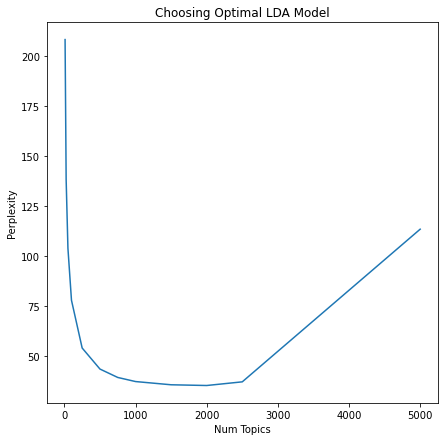

In [118]:
plt.figure(figsize=(7, 7))

plt.plot(n_components, perplexities)

plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Perplexity")

-----

In [87]:
import time
from datetime import timedelta, datetime

print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

n_components = [10, 25, 50, 100, 250, 500, 750, 1000, 1500, 2000, 2500, 5000]
models = {}
for n in n_components:
    model = LatentDirichletAllocation(n_components=n, random_state=0)
    model.fit(data)
    print(f"Model with {n} topics fitted at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    models[n] = model
            
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

22:31:14.862859
Model with 10 topics fitted at 22:32:39.358275.
Model with 25 topics fitted at 22:34:07.038035.
Model with 50 topics fitted at 22:35:37.582921.
Model with 100 topics fitted at 22:37:24.025853.
Model with 250 topics fitted at 22:39:50.745288.
Model with 500 topics fitted at 22:43:43.180046.
Model with 750 topics fitted at 22:50:10.305852.
Model with 1000 topics fitted at 22:58:06.898025.
Model with 1500 topics fitted at 23:10:43.787233.
Model with 2000 topics fitted at 23:27:26.226943.
Model with 2500 topics fitted at 23:47:41.942839.
Model with 5000 topics fitted at 0:25:47.511985.
0:25:47.522832
1:54:32.659973


In [67]:
from collections import defaultdict

scores_by_topic_num = defaultdict(list)

print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

for n in models.keys():
    model = models[n]
    scores_by_topic_num[n].append(model.score(data))
    print(f"Model with {n} topics score found at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

0:17:10.971829
Model with 10 topics score found at 0:17:21.874701.
Model with 25 topics score found at 0:17:35.255733.
Model with 50 topics score found at 0:17:46.650795.
Model with 100 topics score found at 0:17:58.376766.
Model with 250 topics score found at 0:18:21.076702.
Model with 500 topics score found at 0:18:55.503555.
Model with 750 topics score found at 0:19:30.979171.
Model with 1000 topics score found at 0:20:17.502410.
0:20:17.503445
0:03:06.531616


In [88]:
from collections import defaultdict

perplexity_by_topic_num = defaultdict(list)

print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

for n in models.keys():
    model = models[n]
    perplexity_by_topic_num[n].append(model.perplexity(data))
    print(f"Model with {n} topics perplexity found at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

0:26:20.732754
Model with 10 topics perplexity found at 0:26:31.128341.
Model with 25 topics perplexity found at 0:26:42.182093.
Model with 50 topics perplexity found at 0:26:53.416732.
Model with 100 topics perplexity found at 0:27:05.111377.
Model with 250 topics perplexity found at 0:27:19.823590.
Model with 500 topics perplexity found at 0:27:44.691309.
Model with 750 topics perplexity found at 0:28:16.877805.
Model with 1000 topics perplexity found at 0:28:58.905895.
Model with 1500 topics perplexity found at 0:30:03.784889.
Model with 2000 topics perplexity found at 0:31:34.779025.
Model with 2500 topics perplexity found at 0:33:32.931556.
Model with 5000 topics perplexity found at 0:37:10.041073.
0:37:10.041073
0:10:49.308319


In [72]:
scores_by_topic_num

defaultdict(list,
            {10: [-35148601.11461254],
             25: [-32375200.216212433],
             50: [-30264114.902700298],
             100: [-28257957.944363043],
             250: [-25883773.88218416],
             500: [-24367282.776814017],
             750: [-23641773.729498357],
             1000: [-23309145.47898422]})

In [89]:
perplexity_by_topic_num

defaultdict(list,
            {10: [204.97619582876234],
             25: [134.67855094922834],
             50: [97.82583401857791],
             100: [72.19543896679794],
             250: [50.39193452181921],
             500: [40.051821946081674],
             750: [35.88442246531472],
             1000: [34.121584545278694],
             1500: [35.022199839898136],
             2000: [39.21453025404079],
             2500: [49.68849713740994],
             5000: [376.200433562618]})

In [150]:
perp = {10: [204.97619582876234],
             25: [134.67855094922834],
             50: [97.82583401857791],
             100: [72.19543896679794],
             250: [50.39193452181921],
             500: [40.051821946081674],
             750: [35.88442246531472],
             1000: [34.121584545278694],
             1500: [35.022199839898136],
             2000: [39.21453025404079],
             2500: [49.68849713740994],
             5000: [376.200433562618]}

In [151]:
#scores = []
perplexities = []

for n in n_components:
    #scores.append(scores_by_topic_num[n][0])
    perplexities.append(perplexity_by_topic_num[n][0])

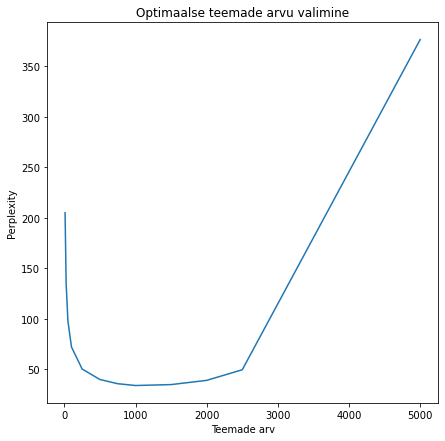

In [152]:
plt.figure(figsize=(7, 7))

plt.plot(n_components, perplexities)

plt.title("Optimaalse teemade arvu valimine")
plt.xlabel("Teemade arv")
plt.ylabel("Perplexity")
plt.savefig("optimal_model_perplexities_final.png")

---

In [80]:
import time
from datetime import timedelta, datetime

print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

n_components = [10, 50, 100, 250, 500, 1000]
decays = [0.6, 0.7, 0.8, 0.9, 1.0]
learning_methods = ['batch', 'online']
models = {}
for n in n_components:
    for method in learning_methods:
        if method == 'online':
            for decay in decays:
                model = LatentDirichletAllocation(n_components=n, learning_method=method, learning_decay=decay, random_state=0)
                model.fit(data)
                print(f"Model with {n} topics, online learning method and {decay} learning decay fitted at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
                models[(n, decay)] = model
        else:
            model = LatentDirichletAllocation(n_components=n, learning_method=method, random_state=0)
            model.fit(data)
            print(f"Model with {n} topics and batch learning method fitted at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
            models[(n, method)] = model
            
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

1:22:48.121763
Model with 10 topics and batch learning method fitted at 1:24:49.628628.
Model with 10 topics, online learning method and 0.6 learning decay fitted at 1:26:09.109533.
Model with 10 topics, online learning method and 0.7 learning decay fitted at 1:27:43.020087.
Model with 10 topics, online learning method and 0.8 learning decay fitted at 1:29:35.566701.
Model with 10 topics, online learning method and 0.9 learning decay fitted at 1:31:30.000870.
Model with 10 topics, online learning method and 1.0 learning decay fitted at 1:33:23.061644.
Model with 50 topics and batch learning method fitted at 1:35:40.491344.
Model with 50 topics, online learning method and 0.6 learning decay fitted at 1:37:56.198461.
Model with 50 topics, online learning method and 0.7 learning decay fitted at 1:40:06.490007.
Model with 50 topics, online learning method and 0.8 learning decay fitted at 1:42:29.356579.
Model with 50 topics, online learning method and 0.9 learning decay fitted at 1:44:54.7

KeyboardInterrupt: 

In [81]:
from collections import defaultdict

scores_by_decays = defaultdict(list)
topics_by_decays = defaultdict(list)

print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

for n, decay in models.keys():
    #if decay != 'batch':
    model = models[(n, decay)]
    scores_by_decays[decay].append(model.score(data))
    print(f"Model with {n} topics and {decay} (decay) score found at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    topics_by_decays[decay].append(n)
    
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

3:52:11.201377
Model with 10 topics and batch (decay) score found at 3:52:22.709274.
Model with 10 topics and 0.6 (decay) score found at 3:52:37.695731.
Model with 10 topics and 0.7 (decay) score found at 3:52:52.756420.
Model with 10 topics and 0.8 (decay) score found at 3:53:07.385339.
Model with 10 topics and 0.9 (decay) score found at 3:53:18.585938.
Model with 10 topics and 1.0 (decay) score found at 3:53:29.873676.
Model with 50 topics and batch (decay) score found at 3:53:42.925274.
Model with 50 topics and 0.6 (decay) score found at 3:53:54.851285.
Model with 50 topics and 0.7 (decay) score found at 3:54:06.687941.
Model with 50 topics and 0.8 (decay) score found at 3:54:19.301632.
Model with 50 topics and 0.9 (decay) score found at 3:54:31.030507.
Model with 50 topics and 1.0 (decay) score found at 3:54:42.909852.
Model with 100 topics and batch (decay) score found at 3:54:56.530761.
Model with 100 topics and 0.6 (decay) score found at 3:55:08.559363.
Model with 100 topics and

In [82]:
from matplotlib import pyplot as plt

batch
0.6
0.7
0.8
0.9
1.0


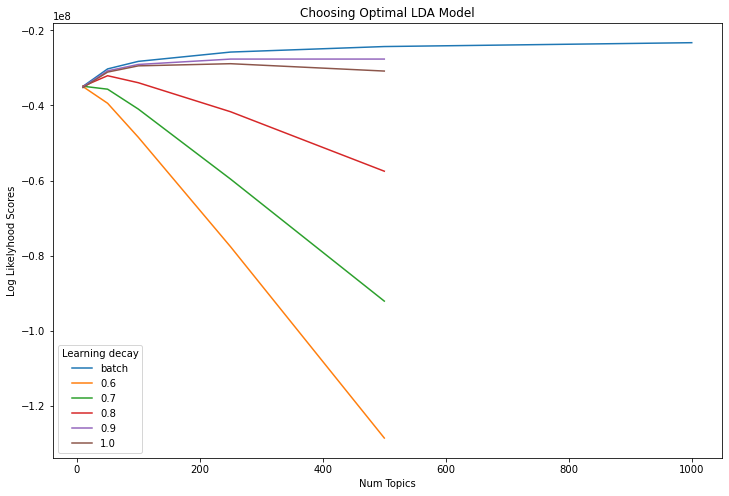

In [83]:
plt.figure(figsize=(12, 8))

for decay in scores_by_decays:
    print(decay)
    scores = scores_by_decays[decay]
    topics = topics_by_decays[decay]
    plt.plot(topics, scores, label=str(decay))

plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.savefig("optimal_model.png")

In [84]:
model = LatentDirichletAllocation(n_components=500, random_state=0)

In [85]:
results = model.fit_transform(data)

In [86]:
topics2 = {}
for i in range(500):
    topics2[i] = []

for i, prob in enumerate(results):
    topics2[np.argmax(prob)].append(data.index[i])

In [88]:
kuud = ['jaanuar', 'veebruar', 'märts', 'aprill', 'mai', 'juuni', 'juuli', 'august', 'mai', 'juuni', 'september', 'oktoober', 'november', 'detsember']
idx = []

for kuu in kuud:
    for topic, words in topics2.items():
        if kuu in words:
            idx.append(topic)
            continue

In [89]:
idx

[210, 210, 210, 210, 458, 278, 210, 181, 458, 278, 189, 189, 189, 189]

In [91]:
for i in set(idx):
    print(i, ":", topics2[i])
    print("----------------------------")

458 : ['kivipõrand', 'talvekuu', 'õu', 'front', 'dushsh', 'peletamine', 'judin', 'kali', 'tomatisupp', 'higi', 'talv', 'talvehommik', 'sõda', 'talveilm', 'kompress', 'talveöö', 'dušš', 'suplus', 'talveõhtu', 'tali', 'kõrgrõhkkond', 'mai', 'tuumasüntees', 'kõrgrõhuala', 'närv']
----------------------------
210 : ['eelarve', 'riigieksam', 'võrgusilm', 'jaanuar', 'käibeprognoos', 'kasumiprognoos', 'läbimõõt', 'kartulisaak', 'MK-sari', 'suvelavastus', 'tootmisplaan', 'erastamisprogramm', 'õllesummer', 'aprill', 'põhihooaeg', 'draft', 'säästueelarve', 'majanduskasvuprognoos', 'põhieelarve', 'veebruar', 'Oscari-gala', 'jazzkaar', 'abiturient', 'teatripreemia', 'suverull', 'lauluvõistlus', 'komeet', 'riigieelarve', 'MK-võistlus', 'juuli', 'avastart', 'jõulupuu', 'põhiturniir', 'märts', 'eurolugu', 'koolilõpetaja', 'orkaanihooaeg', 'peaesineja', 'linnaeelarve', 'playoff', 'sisehooaeg', 'iseseisvuspäev', 'eurolaul', 'võidupüha', 'MM-sari', 'rahupreemia', 'eurovisioon', 'laureaat', 'vanalinnapäe